In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM new_protein4"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-03-05 11:51:14,,inf,2024-03-05 11:51:14
2024-03-05 11:51:14,MQ5,inf,2024-03-05 11:51:14
2024-03-05 11:51:15,MQ6,inf,2024-03-05 11:51:15
2024-03-05 11:51:15,MQ7,inf,2024-03-05 11:51:15
2024-03-05 11:51:16,MQ8,inf,2024-03-05 11:51:16
...,...,...,...
2024-03-05 12:22:27,TGS2620,0.994888425,2024-03-05 12:22:27
2024-03-05 12:22:27,TGS2603,0.992718041,2024-03-05 12:22:27
2024-03-05 12:22:28,TGS2610,0.960295498,2024-03-05 12:22:28


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-03-05 11:51:17,TGS2600,0.991829991,2024-03-05 11:51:17
2024-03-05 11:51:17,TGS2602,0.982858717,2024-03-05 11:51:17
2024-03-05 11:51:17,TGS2612,0.949690461,2024-03-05 11:51:17
2024-03-05 11:51:20,TGS2620,0.983598888,2024-03-05 11:51:20
2024-03-05 11:51:20,TGS2603,0.973390818,2024-03-05 11:51:20
...,...,...,...
2024-03-05 12:22:17,TGS2603,1.005017281,2024-03-05 12:22:17
2024-03-05 12:22:17,TGS2610,0.960295498,2024-03-05 12:22:17
2024-03-05 12:22:18,TGS2611,0.967083812,2024-03-05 12:22:18


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-03-05 11:51:17  0.991829991 2024-03-05 11:51:17
 2024-03-05 11:51:26  0.980396807 2024-03-05 11:51:26
 2024-03-05 11:52:16  0.991829991 2024-03-05 11:52:16
 2024-03-05 11:52:42  1.463449478 2024-03-05 11:52:42
 2024-03-05 11:53:04  1.297668099 2024-03-05 11:53:04
 ...                          ...                 ...
 2024-03-05 12:20:37  0.987542570 2024-03-05 12:20:37
 2024-03-05 12:20:58  1.003263235 2024-03-05 12:20:58
 2024-03-05 12:21:08  0.987542570 2024-03-05 12:21:08
 2024-03-05 12:21:26  0.986113429 2024-03-05 12:21:26
 2024-03-05 12:22:05  0.983255088 2024-03-05 12:22:05
 
 [90 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-03-05 11:51:17  0.982858717 2024-03-05 11:51:17
 2024-03-05 11:51:26  0.982858717 2024-03-05 11:51:26
 2024-03-05 11:51:36  0.982858717 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

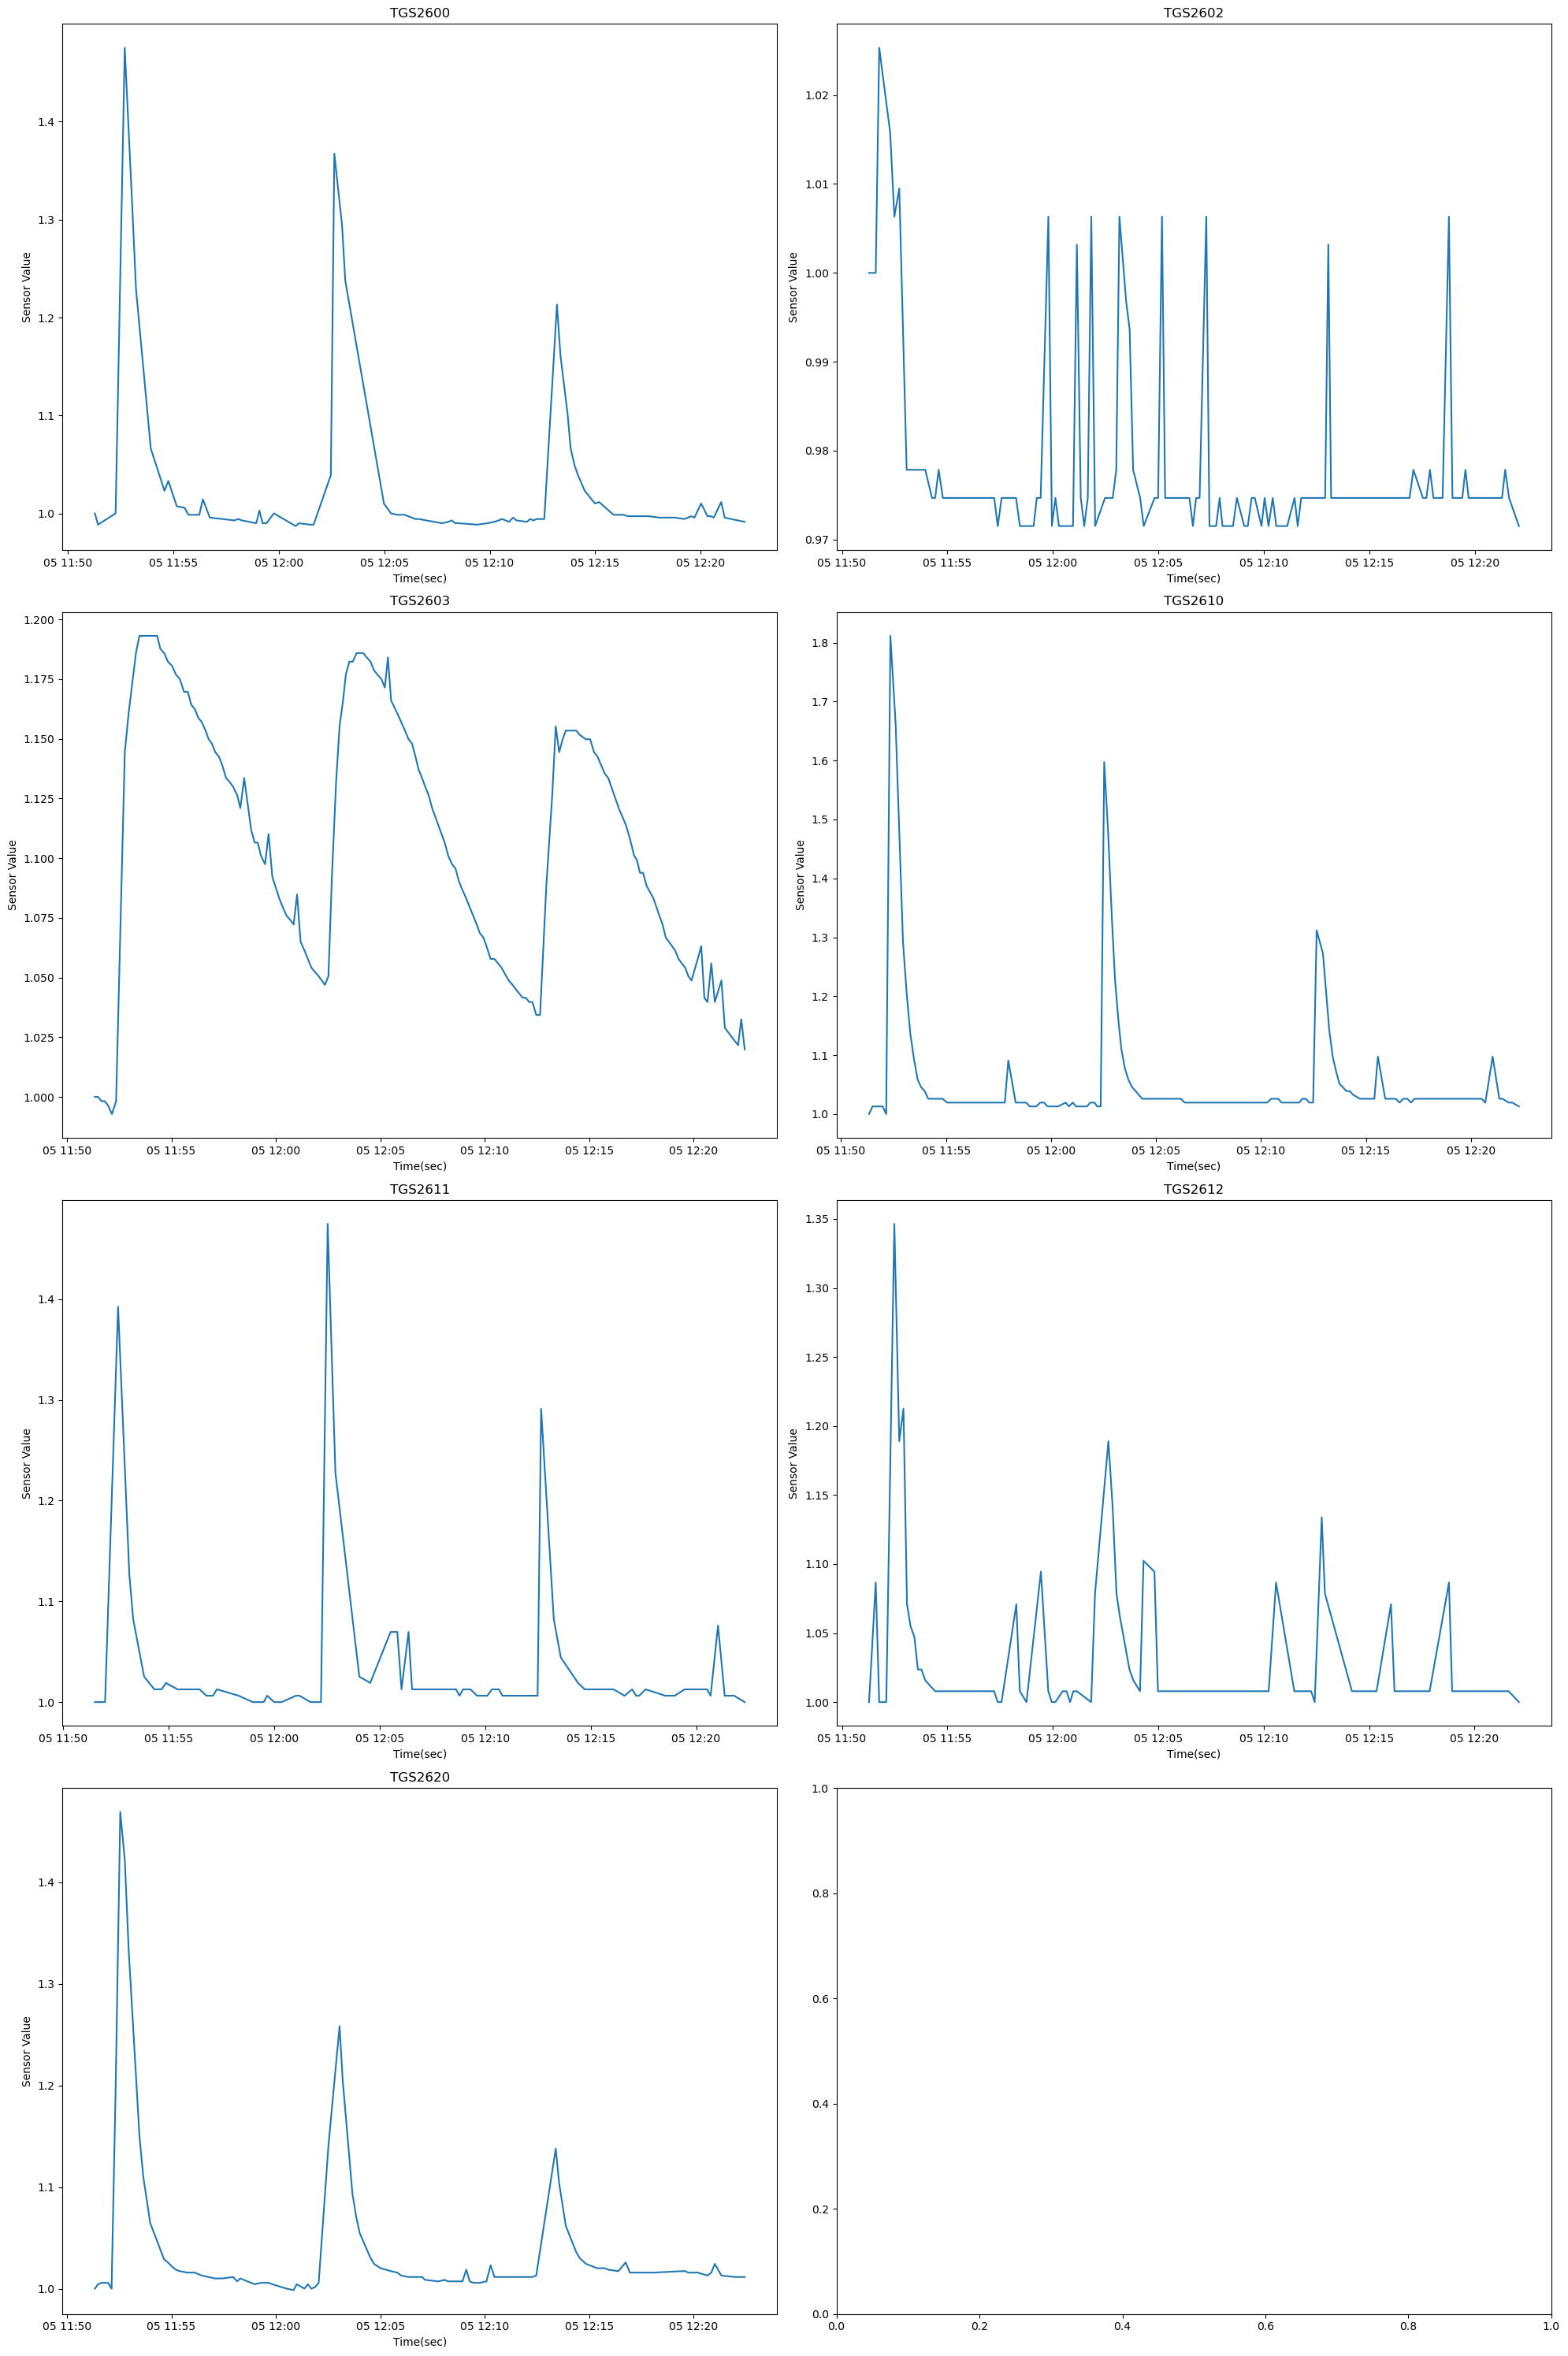

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()